In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import root_mean_squared_error
import os 
os.chdir("C:/Python/Datasets")

In [8]:
df = pd.read_csv("monthly-milk-production-pounds-p.csv")
df

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


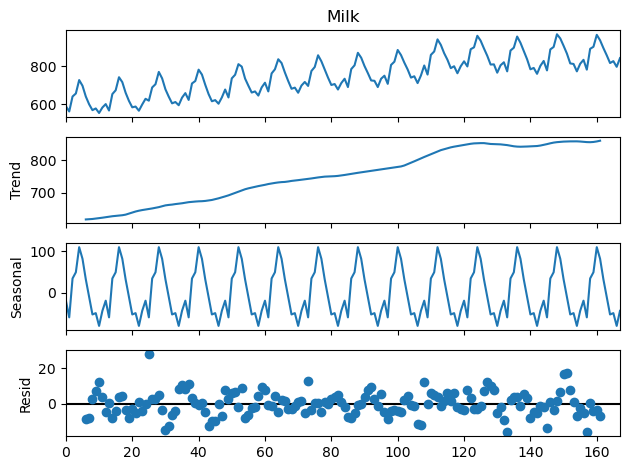

In [6]:
series = df['Milk']
result = seasonal_decompose(series, model='additive',period=12)
result.plot()
plt.show()

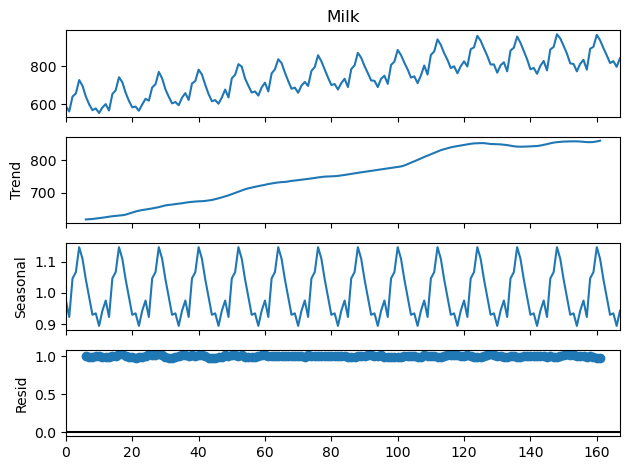

In [10]:
series = df['Milk']
result = seasonal_decompose(series, model='multiplicative',period=12)
result.plot()
plt.show()

#### Centered Rolling Mean

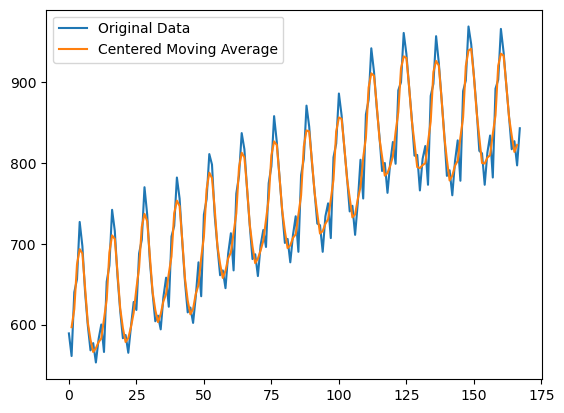

In [16]:
y = df['Milk']
fcast = y.rolling(3,center=True).mean()
plt.plot(y, label='Original Data')
plt.plot(fcast, label='Centered Moving Average')
plt.legend(loc='best')
plt.show()

### Train Test Split

In [17]:
y_train = df['Milk'].iloc[:-12]
y_test = df['Milk'].iloc[-12:]

#### Trailing Rolling Mean

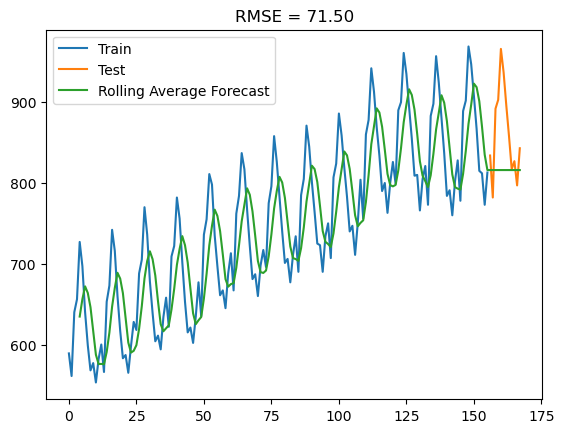

In [26]:
span=5
fcast = y_train.rolling(span).mean()
MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast,MA_series], ignore_index=True)
rmse = root_mean_squared_error(y_test, MA_series)
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(MA_fcast, label='Rolling Average Forecast')
plt.title(f"RMSE = {rmse:.2f}")
plt.legend(loc='best')
plt.show()

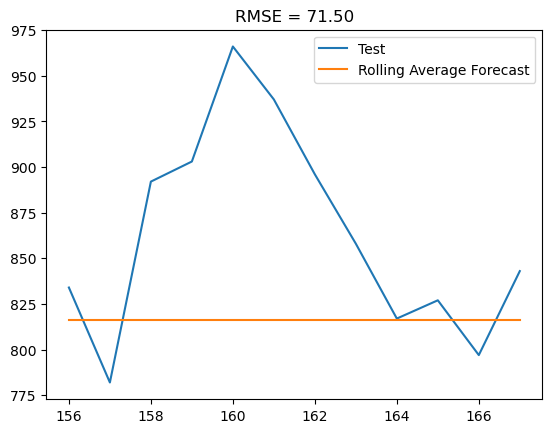

In [31]:
plt.plot(y_test, label='Test')
MA_series.index = y_test.index
plt.plot(MA_series, label='Rolling Average Forecast')
plt.title(f"RMSE = {rmse:.2f}")
plt.legend(loc='best')
plt.show()

#### Simple Exponential Smoothing

In [32]:
from statsmodels.tsa.api import SimpleExpSmoothing

c:\Python\anaconda3\envs\hf\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


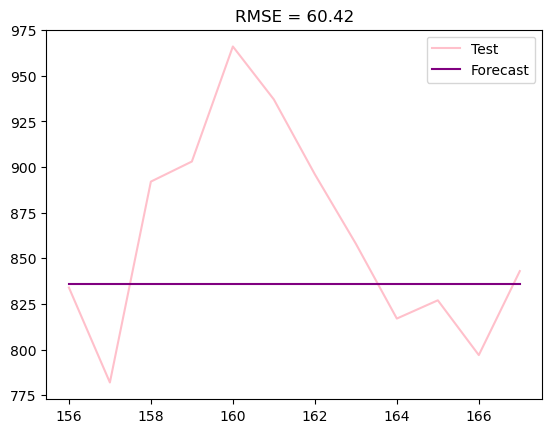

In [37]:
alpha = 0.2
ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
rmse = root_mean_squared_error(y_test, fcast1)
plt.title(f"RMSE = {rmse:.2f}")
plt.legend(loc='best')
plt.show()

In [40]:
from ipywidgets import interact, widgets

In [46]:
ses = SimpleExpSmoothing(y_train)
def simple_exp(alpha):
    fit1 = ses.fit(smoothing_level=alpha)
    fcast1 = fit1.forecast(len(y_test))
    y_test.plot(color="pink", label='Test')
    fcast1.plot(color="purple", label='Forecast')
    rmse = root_mean_squared_error(y_test, fcast1)
    plt.title(f"RMSE = {rmse:.2f}, alpha = {alpha:.2f}")
    plt.legend(loc='best')
    plt.show()
widgets.interact(simple_exp, alpha=(0.01, 1, 0.01))

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), Output()), _d…

<function __main__.simple_exp(alpha)>

#### Holt's Linear Trend

In [48]:
from statsmodels.tsa.api import Holt

c:\Python\anaconda3\envs\hf\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


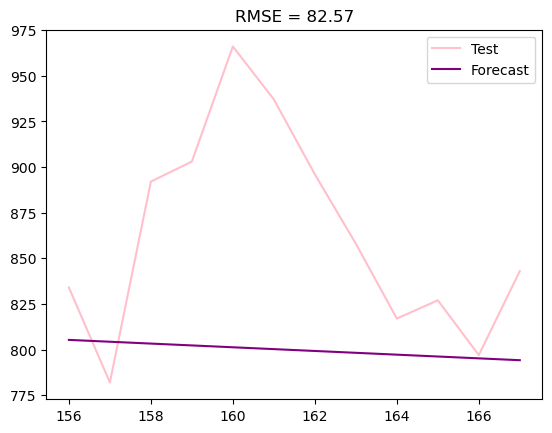

In [50]:
alpha = 0.8
beta = 0.02
holt = Holt(y_train)
fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
rmse = root_mean_squared_error(y_test, fcast1)
plt.title(f"RMSE = {rmse:.2f}")
plt.legend(loc='best')
plt.show()

In [54]:
holt = Holt(y_train)
def holt_linear(alpha, beta):
    fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta)
    fcast1 = fit1.forecast(len(y_test))
    y_test.plot(color="pink", label='Test')
    fcast1.plot(color="purple", label='Forecast')
    rmse = root_mean_squared_error(y_test, fcast1)
    plt.title(f"RMSE = {rmse:.2f}, alpha = {alpha:.2f}, beta = {beta:.2f}")
    plt.legend(loc='best')
    plt.show()
widgets.interact(holt_linear, alpha=(0.01, 1, 0.01), beta=(0.01, 1, 0.01))

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.holt_linear(alpha, beta)>

#### Holt's Exponential Trend

In [ ]:
holt = Holt(y_train, exponential=True)
def holt_exp(alpha, beta):
    fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta)
    fcast1 = fit1.forecast(len(y_test))
    y_test.plot(color="pink", label='Test')
    fcast1.plot(color="purple", label='Forecast')
    rmse = root_mean_squared_error(y_test, fcast1)
    plt.title(f"RMSE = {rmse:.2f}, alpha = {alpha:.2f}, beta = {beta:.2f}")
    plt.legend(loc='best')
    plt.show()
widgets.interact(holt_exp, alpha=(0.01, 1, 0.01), beta=(0.01, 1, 0.01))

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.holt_exp(alpha, beta)>

In [ ]:
def holt_both(alpha, beta, exponentiality):
    holt = Holt(y_train, exponential=exponentiality)
    fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta)
    fcast1 = fit1.forecast(len(y_test))
    y_test.plot(color="pink", label='Test')
    fcast1.plot(color="purple", label='Forecast')
    rmse = root_mean_squared_error(y_test, fcast1)
    plt.title(f"RMSE = {rmse:.2f}, alpha = {alpha:.2f}, beta = {beta:.2f}")
    plt.legend(loc='best')
    plt.show()
widgets.interact(holt_both, alpha=(0.01, 1, 0.01), beta=(0.01, 1, 0.01),
                 exponentiality=[True, False])

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.holt_both(alpha, beta, exponentiality)>

#### Damped Methods

In [ ]:
def damped(alpha, beta, phi, exponentiality, dampness):
    holt = Holt(y_train, exponential=exponentiality, damped_trend=dampness)
    fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta, damping_trend=phi)
    fcast1 = fit1.forecast(len(y_test))
    y_test.plot(color="pink", label='Test')
    fcast1.plot(color="purple", label='Forecast')
    rmse = root_mean_squared_error(y_test, fcast1)
    plt.title(f"RMSE = {rmse:.2f}, alpha = {alpha:.2f}, beta = {beta:.2f}")
    plt.legend(loc='best')
    plt.show()
widgets.interact(damped, alpha=(0.01, 1, 0.01), beta=(0.01, 1, 0.01),phi=(0.01, 1, 0.01),
                 exponentiality=[True, False], dampness=[True, False])

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.damped(alpha, beta, phi, exponentiality, dampness)>

#### Holt-Winters Methods

In [60]:
from statsmodels.tsa.api import ExponentialSmoothing

In [ ]:
def hw(alpha, beta, gamma, seasonality, periods=12):
    holt = ExponentialSmoothing(y_train, trend='add', seasonal=seasonality,seasonal_periods=periods)
    fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
    fcast1 = fit1.forecast(len(y_test))
    y_test.plot(color="pink", label='Test')
    fcast1.plot(color="purple", label='Forecast')
    rmse = root_mean_squared_error(y_test, fcast1)
    plt.title(f"RMSE={rmse:.2f}, alpha={alpha:.2f}, beta={beta:.2f}, gamma={gamma:.2f}")
    plt.legend(loc='best')
    plt.show()
widgets.interact(hw, alpha=(0.01, 1, 0.01), beta=(0.01, 1, 0.01),gamma=(0.01, 1, 0.01),
                 seasonality=['add', 'mul'])

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.hw(alpha, beta, gamma, seasonality, periods=12)>